# Session 1: Processing and exploring raw texts

# Importing packages

As always, we first need to load a number of required Python packages:
- `pandas` provides high-performance, easy-to-use data structures and data analysis tools.
- `NLTK` is a leading platform for building Python programs to work with human language data.
- `itertools` provides functions for creating iterators for efficient looping through data structures.

In [1]:
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import itertools

In [30]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading documents
For this first example, we create 7 documents, each consisting of only one sentence, by hand. The documents are stored in a list called `corpus`.

In [2]:
corpus = [
    "Hello World.",
    "How are you today?",
    "The world is nice.",
    "The weather is also nice.",
    "Yesterday, the weather was also nice.",
    "I own two bicycles.",
    "I love to ride my bicycle."
]

In [3]:
corpus

['Hello World.',
 'How are you today?',
 'The world is nice.',
 'The weather is also nice.',
 'Yesterday, the weather was also nice.',
 'I own two bicycles.',
 'I love to ride my bicycle.']

In [4]:
corpus[5]

'I own two bicycles.'

### Preprocessing documents
As most natural language processing or text minig techniques process sequences of words, we have to tokenize the documents, that is, break them up into words. To do this, we iterate through each document in the corpus and transform them into lists of tokens by splitting by whitespace. The result is a list of lists.

In [8]:
docs_tokenized = []
for doc in corpus:
    tokens = nltk.word_tokenize(doc)
    docs_tokenized.append(tokens)

In [9]:
docs_tokenized

[['Hello', 'World', '.'],
 ['How', 'are', 'you', 'today', '?'],
 ['The', 'world', 'is', 'nice', '.'],
 ['The', 'weather', 'is', 'also', 'nice', '.'],
 ['Yesterday', ',', 'the', 'weather', 'was', 'also', 'nice', '.'],
 ['I', 'own', 'two', 'bicycles', '.'],
 ['I', 'love', 'to', 'ride', 'my', 'bicycle', '.']]

Instead of using a traditional `for .. in .. ` loop, we can do the same more elegantly with Python list comprehension (here: processing a simple list).

In [10]:
docs_tokenized = [nltk.word_tokenize(token) for token in corpus]

In [11]:
docs_tokenized

[['Hello', 'World', '.'],
 ['How', 'are', 'you', 'today', '?'],
 ['The', 'world', 'is', 'nice', '.'],
 ['The', 'weather', 'is', 'also', 'nice', '.'],
 ['Yesterday', ',', 'the', 'weather', 'was', 'also', 'nice', '.'],
 ['I', 'own', 'two', 'bicycles', '.'],
 ['I', 'love', 'to', 'ride', 'my', 'bicycle', '.']]

### Counting words
We are now ready to analyze the documents. We use NLTK's `FreqDist` method (http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist) to create a word frequency distribution from the preprocessed documents. The method expects a single list of words as the input parameter. Hence, we have to flatten our list of lists (https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python).

In [12]:
freq1 = nltk.FreqDist(list(itertools.chain(*docs_tokenized)))

Print the results.

In [13]:
freq1

FreqDist({',': 1,
          '.': 6,
          '?': 1,
          'Hello': 1,
          'How': 1,
          'I': 2,
          'The': 2,
          'World': 1,
          'Yesterday': 1,
          'also': 2,
          'are': 1,
          'bicycle': 1,
          'bicycles': 1,
          'is': 2,
          'love': 1,
          'my': 1,
          'nice': 3,
          'own': 1,
          'ride': 1,
          'the': 1,
          'to': 1,
          'today': 1,
          'two': 1,
          'was': 1,
          'weather': 2,
          'world': 1,
          'you': 1})

When plotting the results, we observe some unwanted results. For example, the tokens `The` and `the` are counted as separate words.

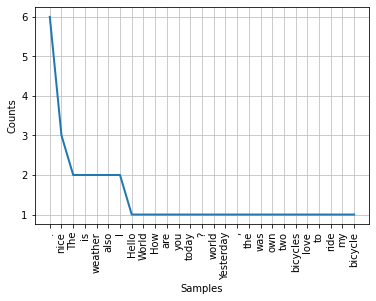

In [14]:
freq1.plot(30, cumulative=False)

### More preprocessing
To address the above problem, we go back to preprocessing and transform all tokens to lowercase.

In [15]:
docs_tokenized_lower = []
for doc in docs_tokenized:
    tokens = []
    for token in doc:
        tokens.append(token.lower())
    docs_tokenized_lower.append(tokens)

In [16]:
docs_tokenized_lower

[['hello', 'world', '.'],
 ['how', 'are', 'you', 'today', '?'],
 ['the', 'world', 'is', 'nice', '.'],
 ['the', 'weather', 'is', 'also', 'nice', '.'],
 ['yesterday', ',', 'the', 'weather', 'was', 'also', 'nice', '.'],
 ['i', 'own', 'two', 'bicycles', '.'],
 ['i', 'love', 'to', 'ride', 'my', 'bicycle', '.']]

Or more elegantly with Python list comprehension (here: processing a list of lists)

In [17]:
docs_tokenized_lower = [[token.lower() for token in tokens] for tokens in docs_tokenized]

In [18]:
docs_tokenized_lower

[['hello', 'world', '.'],
 ['how', 'are', 'you', 'today', '?'],
 ['the', 'world', 'is', 'nice', '.'],
 ['the', 'weather', 'is', 'also', 'nice', '.'],
 ['yesterday', ',', 'the', 'weather', 'was', 'also', 'nice', '.'],
 ['i', 'own', 'two', 'bicycles', '.'],
 ['i', 'love', 'to', 'ride', 'my', 'bicycle', '.']]

### Recounting words
And we create and plot the frequency distribution again.

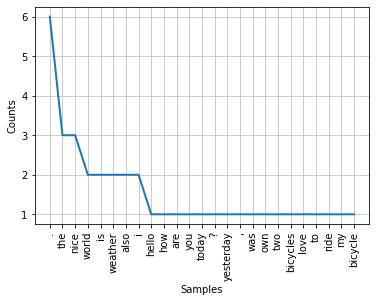

In [19]:
freq2 = nltk.FreqDist(list(itertools.chain(*docs_tokenized_lower)))
freq2.plot(30, cumulative=False)

Now, `the` is only counted once (3 occurences). But there are still problems. For example, `bicycle` and `bicycles`.

### More preprocessing
We can fix this issue with 
- stemming (https://en.wikipedia.org/wiki/Stemming) or

In [20]:
stemmer = PorterStemmer()
print(stemmer.stem('bicycles'))

bicycl


- lemmatization (https://en.wikipedia.org/wiki/Lemmatisation).

NLTK's WordNet Lemmatizer reduces tokens to their dictionary form. We have to tell the lemmatization method which part of speech (https://en.wikipedia.org/wiki/Part_of_speech) the word to be lemmatized is.

In [23]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('bicycles','n')) # n = noun, v = verb, ...

bicycle


To lemmatize all tokens in all documents, we again iterate through our list of documents and call the lemmatize method on each word. Unfortunately, the results are somewhat surprising, as we don't know which part of speech the tokens are (see, e.g., `was` -> `wa`). For now, we ignore these mistakes.

In [24]:
docs_tokenized_lower_lemmatized = []
for doc in docs_tokenized_lower:
    tokens = []
    for token in doc:
        tokens.append(str(lemmatizer.lemmatize(token, 'n')))
    docs_tokenized_lower_lemmatized.append(tokens)

In [25]:
docs_tokenized_lower_lemmatized

[['hello', 'world', '.'],
 ['how', 'are', 'you', 'today', '?'],
 ['the', 'world', 'is', 'nice', '.'],
 ['the', 'weather', 'is', 'also', 'nice', '.'],
 ['yesterday', ',', 'the', 'weather', 'wa', 'also', 'nice', '.'],
 ['i', 'own', 'two', 'bicycle', '.'],
 ['i', 'love', 'to', 'ride', 'my', 'bicycle', '.']]

Or more elegantly with Python list comprehension (here: processing a list of lists)

In [26]:
docs_tokenized_lower_lemmatized = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in docs_tokenized_lower]

In [27]:
docs_tokenized_lower_lemmatized

[['hello', 'world', '.'],
 ['how', 'are', 'you', 'today', '?'],
 ['the', 'world', 'is', 'nice', '.'],
 ['the', 'weather', 'is', 'also', 'nice', '.'],
 ['yesterday', ',', 'the', 'weather', 'wa', 'also', 'nice', '.'],
 ['i', 'own', 'two', 'bicycle', '.'],
 ['i', 'love', 'to', 'ride', 'my', 'bicycle', '.']]

### Recounting words, again

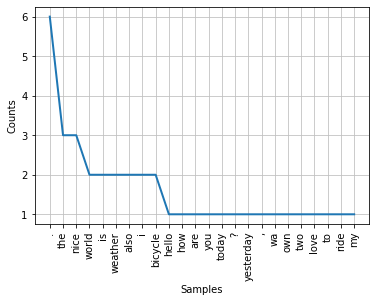

In [28]:
freq3 = nltk.FreqDist(list(itertools.chain(*docs_tokenized_lower_lemmatized)))
freq3.plot(30, cumulative=False)

Now, `bicycle` appears only once in the results. But we see some words which are not very informative for our analysis, e.g., `the`, `is`, or `.`.

### Again, back to preprocessing
One typically removes these so-called stopwords before mining the texts. NLTK provides a list of standard English stopwords.

In [31]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Again, we iterate through our list of documents and only extract tokens that are not stopwords and alphanumeric (no punctuation or special characters).

In [32]:
docs_tokenized_lower_lemmatized_reduced = []
for doc in docs_tokenized_lower_lemmatized:
    tokens = []
    for token in doc:
        if token.isalpha() and token not in stopwords.words('english'):
            tokens.append(token)
    docs_tokenized_lower_lemmatized_reduced.append(tokens)

In [33]:
docs_tokenized_lower_lemmatized_reduced

[['hello', 'world'],
 ['today'],
 ['world', 'nice'],
 ['weather', 'also', 'nice'],
 ['yesterday', 'weather', 'wa', 'also', 'nice'],
 ['two', 'bicycle'],
 ['love', 'ride', 'bicycle']]

Or more elegantly with Python list comprehension (processing a list of lists *with if condition*)

In [34]:
docs_tokenized_lower_lemmatized_reduced = [[token for token in tokens if token.isalpha() and token not in stopwords.words('english')] for tokens in docs_tokenized_lower_lemmatized]

In [35]:
docs_tokenized_lower_lemmatized_reduced

[['hello', 'world'],
 ['today'],
 ['world', 'nice'],
 ['weather', 'also', 'nice'],
 ['yesterday', 'weather', 'wa', 'also', 'nice'],
 ['two', 'bicycle'],
 ['love', 'ride', 'bicycle']]

### Plot the final results

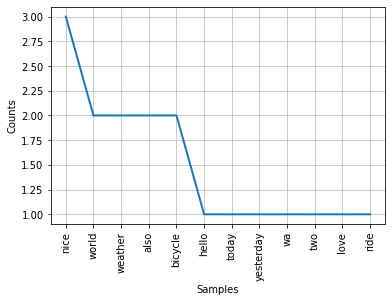

In [36]:
freq4 = nltk.FreqDist(list(itertools.chain(*docs_tokenized_lower_lemmatized_reduced)))
freq4.plot(30, cumulative=False)